# Medicare and Hospital Charge Analysis

On their website, the Centers for Medicare & Medicaid Services (CMS) has released [datasets](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Inpatient2014.html) for 2011 through 2014 which show the average value of hospital-billed charges and Medicare reimbursement rates on a per-hospital basis (for the 100 most common diagnosis related groups (DRGs)). Hospital-billed charges are the amount of money charged by a hospital for performing a certain procedure, whereas the Medicare reimbursement rates are the prices that the government has agreed to pay for those same procedures.

If Medicare payments are below the amount needed by hospitals to recoup their operating costs, as the American Hospital Association [suggests](http://www.aha.org/content/13/hospbill-explain.pdf) is the case, the burden of paying higher premiums may be shifted over to those on private insurance plans. According to the AHA, about 64.8% of hospitals are losing money because of costs of procedures for Medicare patients.

Hospital charges are usually not immediately consequential for determining the amount of money that will be paid by a public or private health insurance plan for a healthcare procedure. However, uninsured patients sometimes still have to pay the full hospital charges and out-of-network patients often have to pay some part of the full charges. 

Overall, the high markups in hospital charge prices make it very difficult for patients to gauge relationships between price and quality in healthcare providers, and for anyone outside of a hospital system to gauge the financial health of that system (in particular, whether or not the system is able to obtain positive net earnings).

Below, I walk through my steps for exploratory analysis of some aspects of the 2014 hospital charge dataset, paying particular attention to the light this dataset sheds on differences in healthcare market transparency across the country.

__Table of Contents__
* Preparing for Analysis
* Loading and Cleaning the Dataset
* Most Common DRGs
* DRG 470 Charges by State
    * Hospital Charges and Medicare Payments in California
    * Hospital Charges and Medicare Payments in Maryland
* Conclusion



## Preparing for Analysis

First, we'll load a few Python libraries to aid with analyzing and visualizing this dataset. In particular, the Pandas library will allow us to load CSV data, change how it is grouped, and quickly sort and splice the dataset. The Seaborn library will allow us to create some more complex visualizations of this multivariate data and gauge how different charges relate to each other.

In [59]:
#Render out plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

## Loading and Cleaning the Dataset

We will need to use Pandas to load the CSV dataset. The dataset includes the following fields:

* __DRG Definition__: A description of one of the 100 most common diagnostic resource groups
* __Provider Id__: The numerical identifier for a specific hospital
* __Provider Name__: The name of the same hospital
* __Provider Street Address__: The street address of the same hospital
* __Provider City__: The city where this specific hospital is located
* __Provider State__: The state where this specific hospital is located
* __Provider Zip Code__: The zip code where this specific hospital is located
* __Hospital Referral Region (HRR) Description__: The Hospital Referral Region (regional health care market for tertiary medical care) where this specific hospital is located.
* __Total Discharges__: The total number of patients who were released from this specific inpatient hospital after receiving care related to this specific DRG.
* __Average Covered Charges__: The amount of money charged by the hospital for this medical procedure (how much the provider charges to Medicare).
* __Average Total Payments__: The amount of money received by the hospital for this medical procedure (This includes the reimbursement from Medicare, as well as third party payments for coordinating benefits, and any co-payment and deductible amounts that the patient is responsible for).
* __Average Medicare Payments__: The amount of money that Medicare has reimbursed to the hospital for this medical procedure.

In order to be able to chart and compare the various charge and payment variables in this dataset, we will need to remove the dollar symbol ('$') from the __Average Covered Charges__, __Average Total Payments__, and __Average Medicare Payments__ columns. Then, we will need to convert the variable type for these columns to a 'float' type.

In [60]:
health_charges = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv')
health_charges['Average Covered Charges'] = health_charges['Average Covered Charges'].replace('[\$,]','',regex=True).astype(float)
health_charges['Average Total Payments'] = health_charges['Average Total Payments'].replace('[\$,]','',regex=True).astype(float)
health_charges['Average Medicare Payments'] = health_charges['Average Medicare Payments'].replace('[\$,]','',regex=True).astype(float)

Let's take a look at the first few rows of our dataset to ensure it has loaded properly.

In [61]:
health_charges[:5]

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,619 SOUTH 19TH STREET,BIRMINGHAM,AL,35233,AL - Birmingham,13,1172866.385,251876.3077,244457.9231
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,5777 EAST MAYO BOULEVARD,PHOENIX,AZ,85054,AZ - Phoenix,20,437531.300,240422.8000,133509.5500
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,2801 L STREET,SACRAMENTO,CA,95816,CA - Sacramento,25,815674.120,233197.4800,221681.8000
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,757 WESTWOOD PLAZA,LOS ANGELES,CA,90095,CA - Los Angeles,14,1499043.571,415968.7857,366608.9286
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,23,2238699.130,420865.4783,403453.6522


## Most Common DRGs

Initially, let's identify which DRGs were most frequently invoked to treat patients under Medicare. We can do this by grouping our dataset by DRG code, aggregating by the sum of total discharges at each hospital under those DRGs, and then sorting in an descending order.

In [62]:
# We want to find out which DRG codes are most common across the country, so let's create a new column to store the total discharges for a DRG code
DRGgrouped = health_charges.groupby('DRG Definition')
DRGgrouped.agg({'Total Discharges': np.sum}).sort_values(by=['Total Discharges'], ascending=0)[:10]

,Total Discharges
DRG Definition,
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,458259
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,438597
291 - HEART FAILURE & SHOCK W MCC,198889
292 - HEART FAILURE & SHOCK W CC,192918
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",190375
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,159823
194 - SIMPLE PNEUMONIA & PLEURISY W CC,148808
683 - RENAL FAILURE W CC,144145
378 - G.I. HEMORRHAGE W CC,138485


## DRG 470 Charges by State

Since we know that DRG 470 (Joint Replacement/Lower Extremity Reattachment) is the most frequently reimbursed procedure for Medicare, let's take a look at how hospital charges for this DRG differ across states. We can do this by filtering our table by DRG code, and then creating a Seaborn stripplot which compares Average Covered Charges by Provider State.

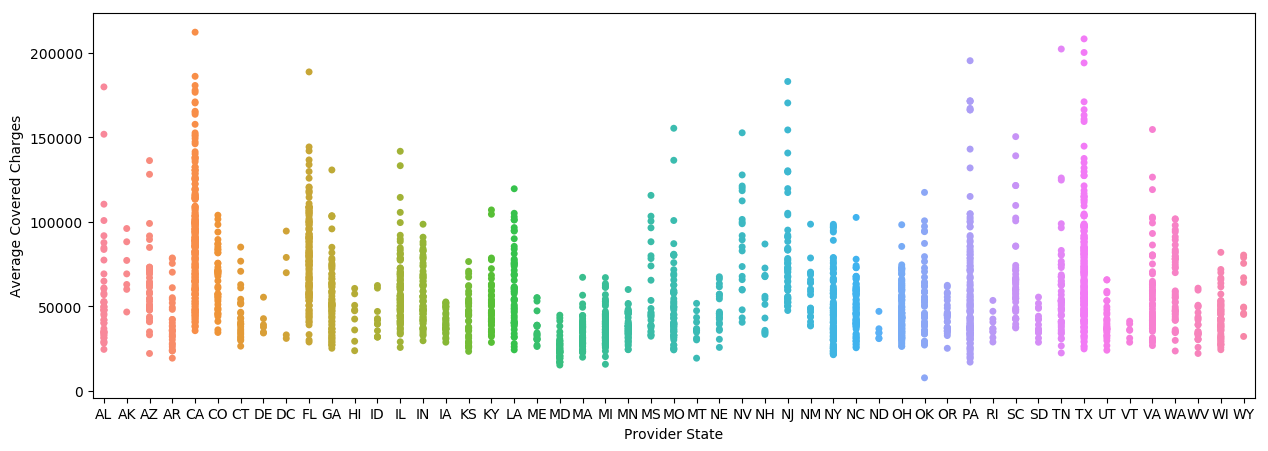

In [63]:
# Let's take a closer look at how charges for the most common DRG differ across states
drg470 = health_charges[health_charges["DRG Definition"].str.contains("470")]
sns.stripplot(x="Provider State", y="Average Covered Charges", data=drg470)

This chart shows that hospital charges in this DRG group vary greatly across the United States, and often within certain states. In particular, California, Florida, Texas, New Jersey and Pennsylvania seem to have great variety in hospital charge amounts for this procedure within their states, including charges far beyond those in many other states.

### Hospital Charges and Medicare Payments in California

Let's dive deeper into the data for one of these states with more variety in hospital charge amounts. We can use 'groupby' on our dataset for DRG 470 to allow for easy extraction of California data. Then, we can use a 'pairplot' to plot the pairwise relationship between Average Medicare Payments and Average Covered Charges in California. The scatterplots show the joint relationships between Average Medicare Payments and Average Covered Charges, whereas the histograms show the univariate distributions of each.

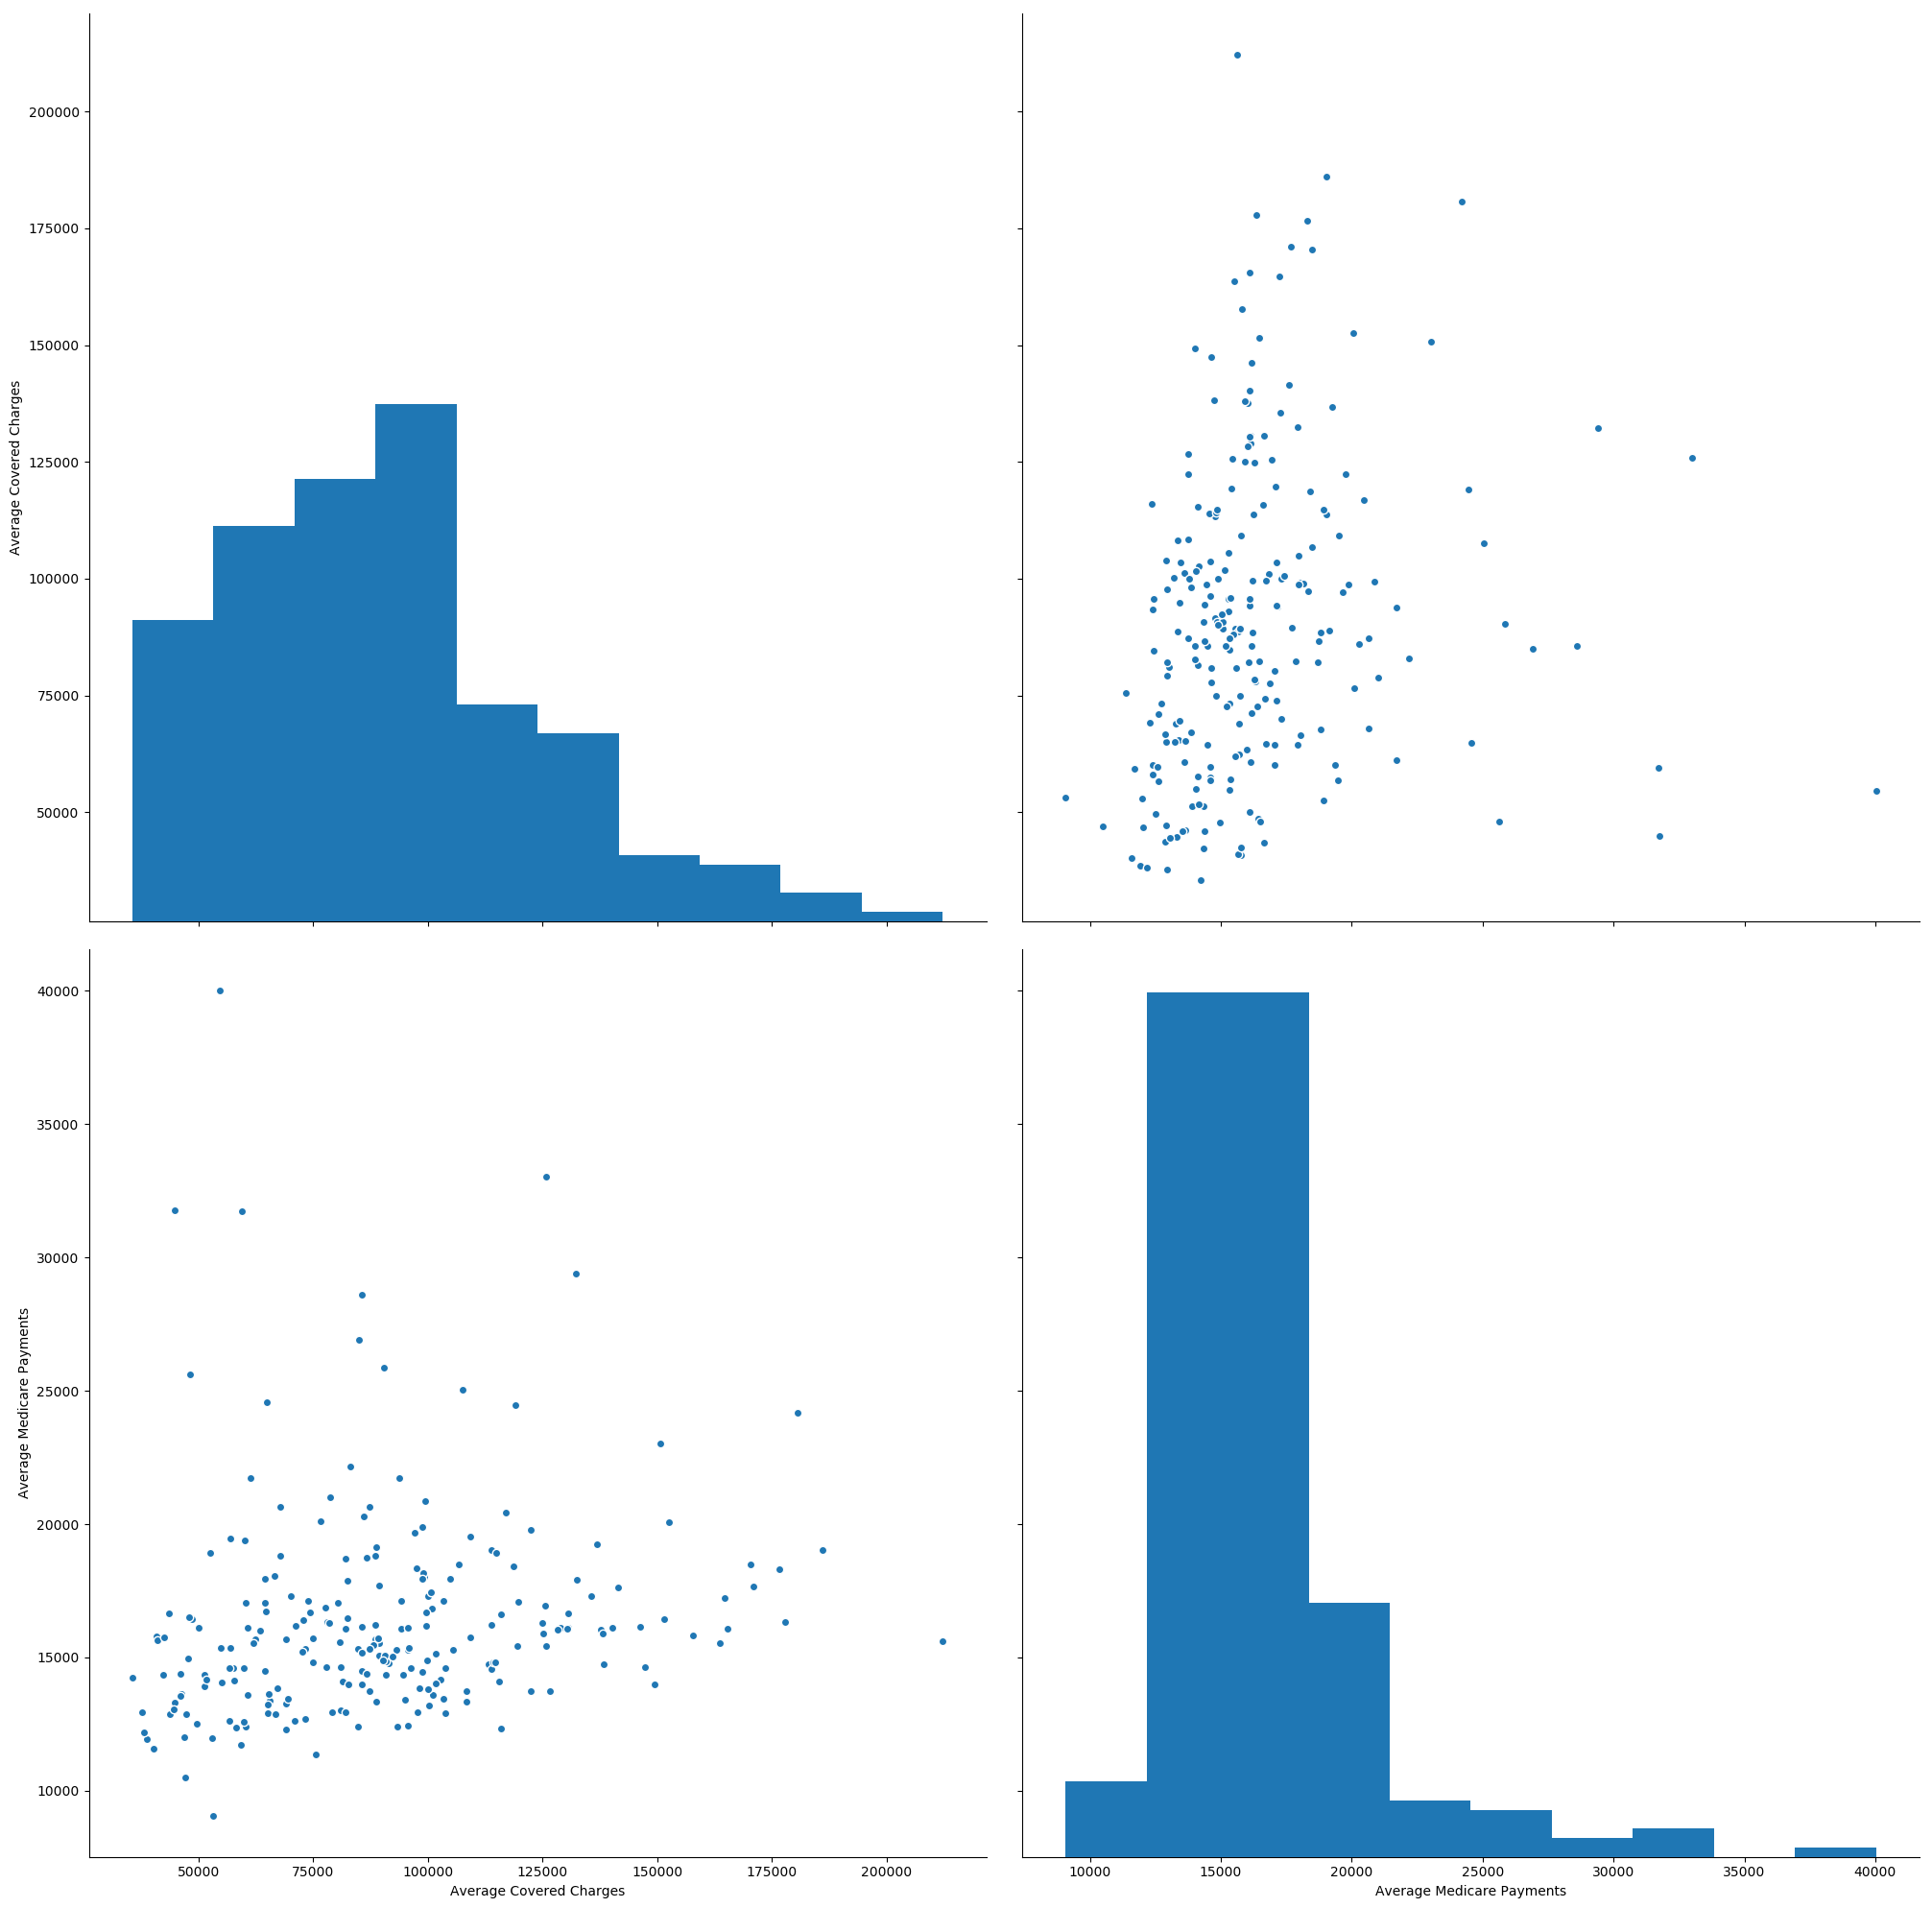

In [64]:
drg470_state_grouped = drg470.groupby(["Provider State"])
sns.pairplot(drg470_state_grouped.get_group("CA"), size = 10, vars=["Average Covered Charges", "Average Medicare Payments"])

What we see is a situation where Medicare payment amounts for these procedures are most often between `$`10,000 and `$`20,000, whereas hospital charges tend to be most often between `$`50,000 and `$`150,000. The result of these marked up hospital charges is shown in the heavily skewed clusters on the  scatter plots above. DRG 470 procedures appear to be an example of the lack of price transparency that healthcare consumers or industry analysts would find in the California marketplace, and many other healthcare markets across the country.

### Hospital Charges and Medicare Payments in Maryland

The stripplot we created a bit above showing hospital charges by state for DRG 470 also included some locations that had much less difference in statewide hospital charges than California. One of the lowest and most even distributions for hospital charges appeared to be in Maryland. We can use the same 'groupby' dataset we created above to take a look at the 'pairplot' for the relationship between Average Medicare Payments and Average Covered Charges for DRG 470 in Maryland.

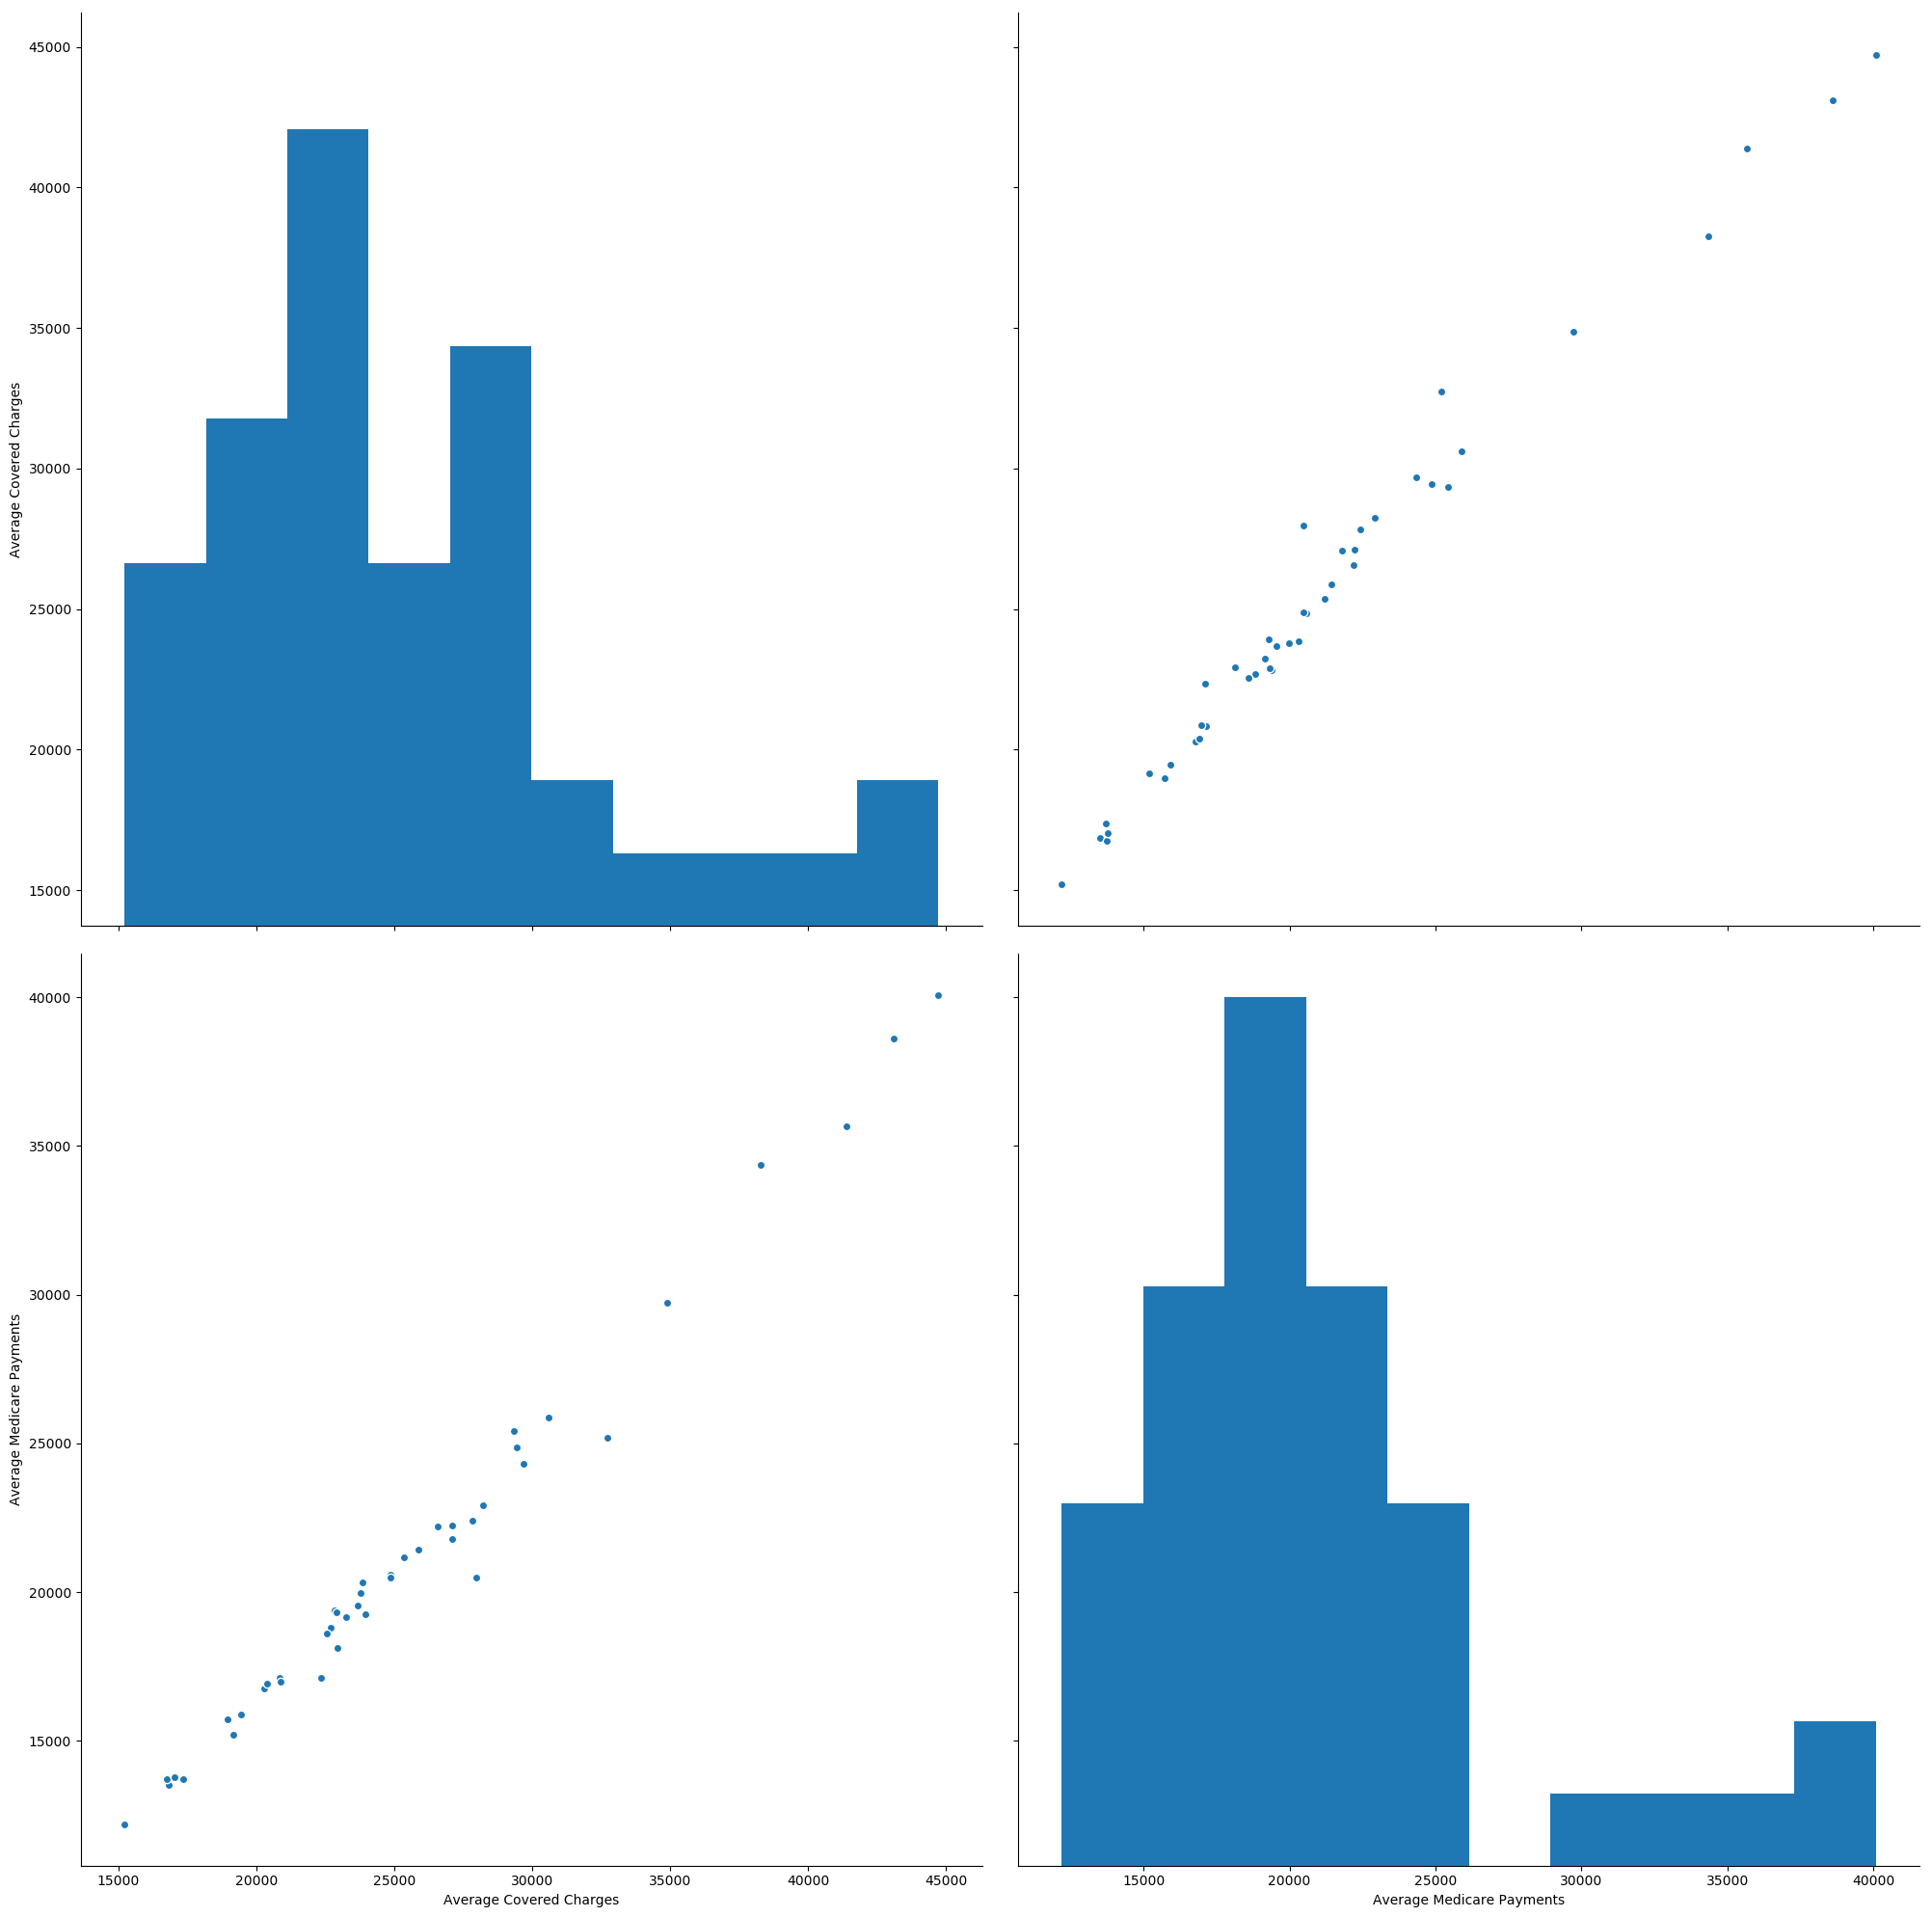

In [65]:
sns.pairplot(drg470_state_grouped.get_group("MD"), size = 10, vars=["Average Covered Charges", "Average Medicare Payments"])

These charts appear to depict a very different relationship from the one visible for California's data. We see an almost one-to-one relationship between hospital charge amounts and average Medicare payments in Maryland. 

It turns out that Maryland's data for hospital charges is quite unique in comparison to the rest of the country because Maryland is the only state which has a central government body that sets standardized payment rates for hospital procedures, across all public and private insurance plans. 

This system was set up in 1971 in reaction to rising hospital costs and large losses incurred by treating uninsured patients. The centralized rate-setting system has created a transparent marketplace for consumers and kept growth of hospital costs below the national trend. 

# Conclusion

In the above analysis, we took a look at how the relationship between hospital charges and Medicare payments differed across the country in 2014, particularly for procedures related to the most common DRG (470 - Joint Replacement/Lower Extremity Reattachment). The result is a first-hand view of the distortions and lack of transparency for consumers in most of the U.S. healthcare market.

[A study](http://content.healthaffairs.org/content/28/5/1395.full) describes how, if Maryland had not adopted their unique system, "hospital spending would have been cumulatively `$`40 billion higher than what resulted under rate setting. On the other hand, had the nation’s costs grown at Maryland’s rate of growth, cumulative savings would have exceeded `$`1.8 trillion." Despite Maryland's innovation in rate-setting, it is still dealing with the issue of increasing patient volume in hospitals (particularly admissions and out-patient visits) - yet another challenge facing the entire country's entire healthcare marketplace.